In [158]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

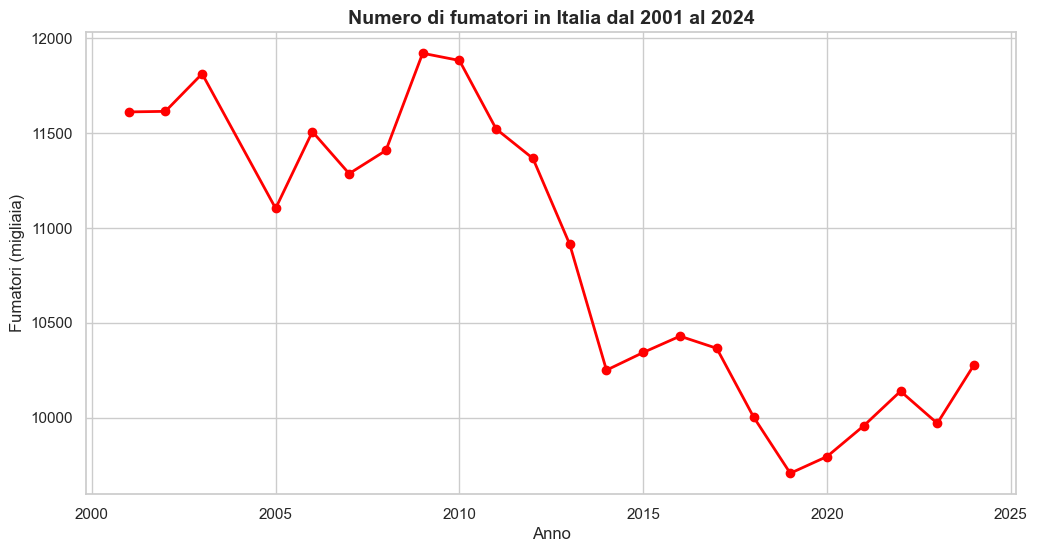

In [159]:
df = pd.read_csv('dati\\Abitudine al fumo.csv') # Lettura del file CSV
df.sort_values(by="TIME_PERIOD", inplace=True) #ordino dati per anno
fumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: fumatori") &
              (df["MEASURE"] == "THV")] #filtro per fumatori


# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(
    fumatori["TIME_PERIOD"],
    fumatori["Osservazione"],
    marker="o",
    color="red",
    linewidth=2.0
)

plt.xlabel("Anno")
plt.ylabel("Fumatori (migliaia)")
plt.title("Numero di fumatori in Italia dal 2001 al 2024", fontsize=14, fontweight="bold")
plt.show()



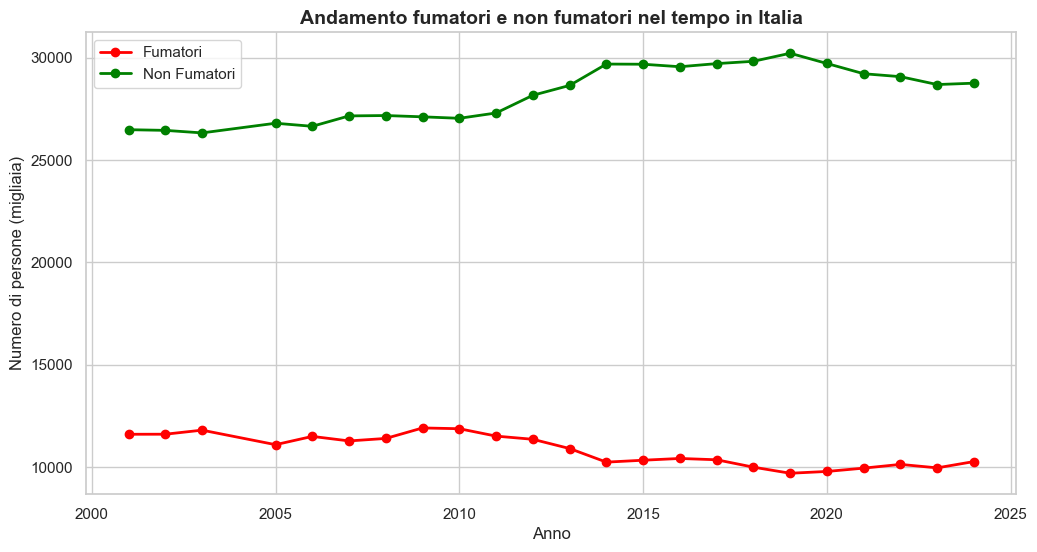

In [160]:

nonFumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: non fumatori") &
              (df["MEASURE"] == "THV")]

# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(
    fumatori["TIME_PERIOD"],
    fumatori["Osservazione"],
    marker="o",
    color="red",
    linewidth=2.0
)
plt.plot(
    nonFumatori["TIME_PERIOD"],
    nonFumatori["Osservazione"],
    marker="o",
    color="green",
    linewidth=2.0
)

plt.xlabel("Anno")
plt.ylabel("Numero di persone (migliaia)")
plt.title("Andamento fumatori e non fumatori nel tempo in Italia",fontsize=14, fontweight="bold")
plt.legend(["Fumatori", "Non Fumatori"])
plt.show()

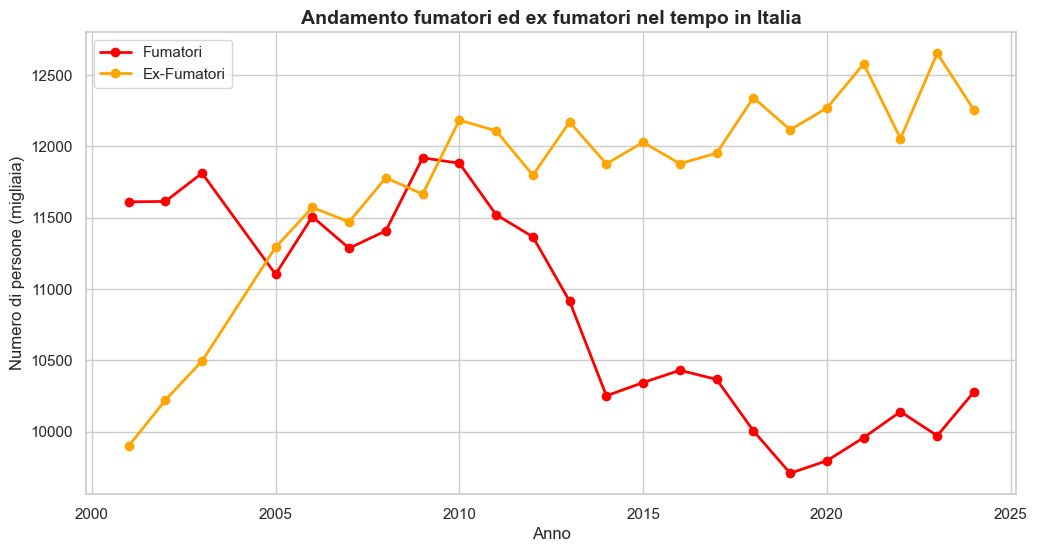

In [161]:
exFumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: ex fumatori") &
              (df["MEASURE"] == "THV")]
# Creazione del grafico
plt.figure(figsize=(12, 6))

plt.plot(
    fumatori["TIME_PERIOD"],
    fumatori["Osservazione"],
    marker="o",
    color="red",
    linewidth=2.0
)
plt.plot(
    exFumatori["TIME_PERIOD"],
    exFumatori["Osservazione"],
    marker="o",
    color="orange",
    linewidth=2.0
)

plt.xlabel("Anno")
plt.ylabel("Numero di persone (migliaia)")
plt.title("Andamento fumatori ed ex fumatori nel tempo in Italia",fontsize=14, fontweight="bold")
plt.legend(["Fumatori", "Ex-Fumatori"])
plt.show()

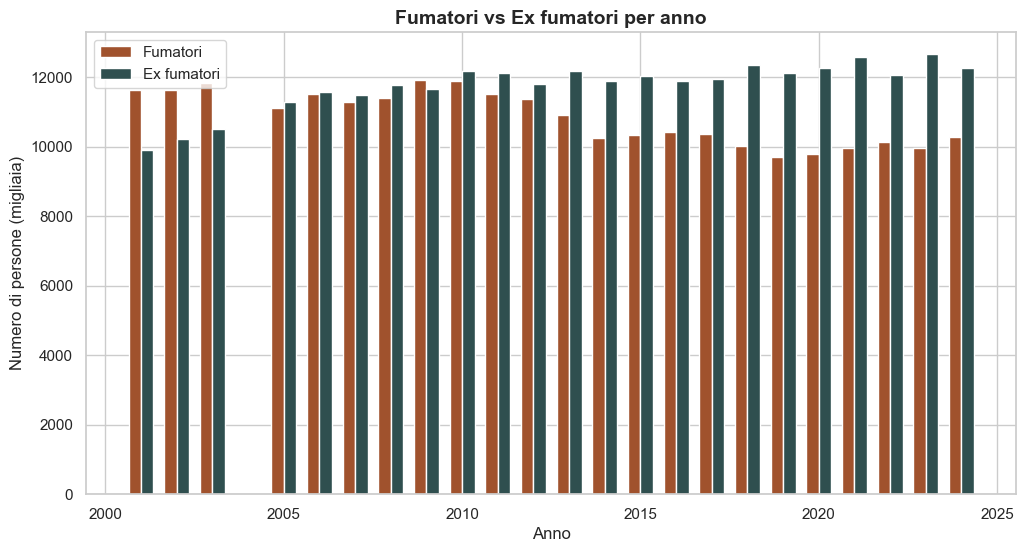

In [162]:
anni = fumatori["TIME_PERIOD"]
# stile: verrà applicato a tutti i grafici successivi
sns.set_theme(style="whitegrid")

# Creazione del grafico
plt.figure(figsize=(12, 6))
width = 0.35  # larghezza delle barre

plt.bar(anni - width/2, fumatori["Osservazione"], width=width, label="Fumatori", color='sienna')
plt.bar(anni + width/2, exFumatori["Osservazione"], width=width, label="Ex fumatori", color='darkslategrey')

plt.xlabel("Anno")
plt.ylabel("Numero di persone (migliaia)")
plt.title("Fumatori vs Ex fumatori per anno",fontsize=14, fontweight="bold")
plt.legend()
plt.show()

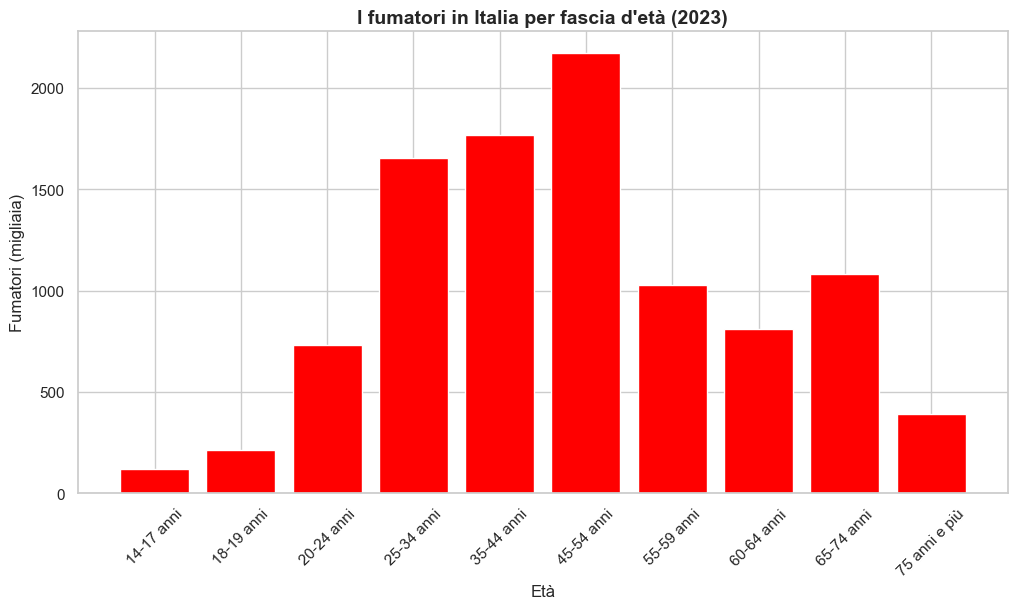

In [163]:
df = pd.read_csv('dati\\Abitudine al fumo - età dettaglio.csv')

df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce') # converto in numerico
df.dropna(subset=["Osservazione"], inplace=True) # rimuovo eventuali righe con valori non numerici
df_filtered = df[(df["TIME_PERIOD"] == 2023) &  # filtro per anno 2023
                 (df["Sesso"] == "Totale") &    # filtro per sesso totale
                 (df["MEASURE"] == 'THV') &     # filtro per misura in migliaia
                 (df["DATA_TYPE"] == '14_FUMO_SI')& # filtro per fumatori
                 (df["AGE"] != 'Y_GE14')]       # escludo la categoria "14 anni e più" che considera tutti

plt.figure(figsize=(12, 6))
anno = df_filtered["Età"]
value = df_filtered["Osservazione"]
plt.bar(anno, value, color='red')
plt.xticks(rotation=45)  # ruota le etichette di 45°
plt.xlabel("Età")
plt.ylabel("Fumatori (migliaia)")
plt.title("I fumatori in Italia per fascia d'età (2023)",fontsize=14, fontweight="bold")
plt.show()

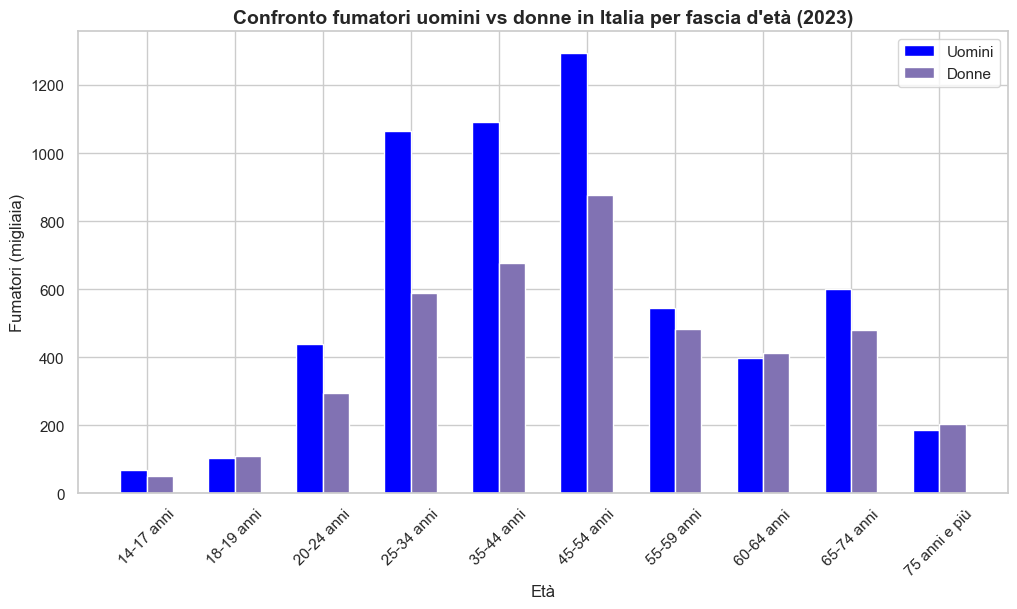

In [164]:

#filtraggio dei dati - solo 2023, misura per migliaia, solo fumatori, escluso conteggio totale
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["MEASURE"] == 'THV') &
                 (df["DATA_TYPE"] == '14_FUMO_SI')& 
                 (df["AGE"] != 'Y_GE14')]

#separazione per sesso
uomini = df_filtered[df_filtered["Sesso"] == "Maschi"]
donne = df_filtered[df_filtered["Sesso"] == "Femmine"]

# Creazione del grafico a barre affiancate
plt.figure(figsize=(12, 6))

#estrazione dei valori
width = 0.3  # larghezza delle barre
#numero di fasce d'età
x = np.arange(len(uomini))
#creazione delle due barre, messe affiancate
plt.bar(x - width/2, uomini["Osservazione"], width=width, label="Uomini", color='blue')
plt.bar(x + width/2, donne["Osservazione"], width=width, label="Donne", color='m')
#rotazione etichette asse x
plt.xticks(x, uomini["Età"], rotation=45)

plt.xticks(rotation=45)  # ruota le etichette di 45°

plt.legend()
plt.xlabel("Età")
plt.ylabel("Fumatori (migliaia)")
plt.title("Confronto fumatori uomini vs donne in Italia per fascia d'età (2023)",fontsize=14, fontweight="bold")
plt.show()

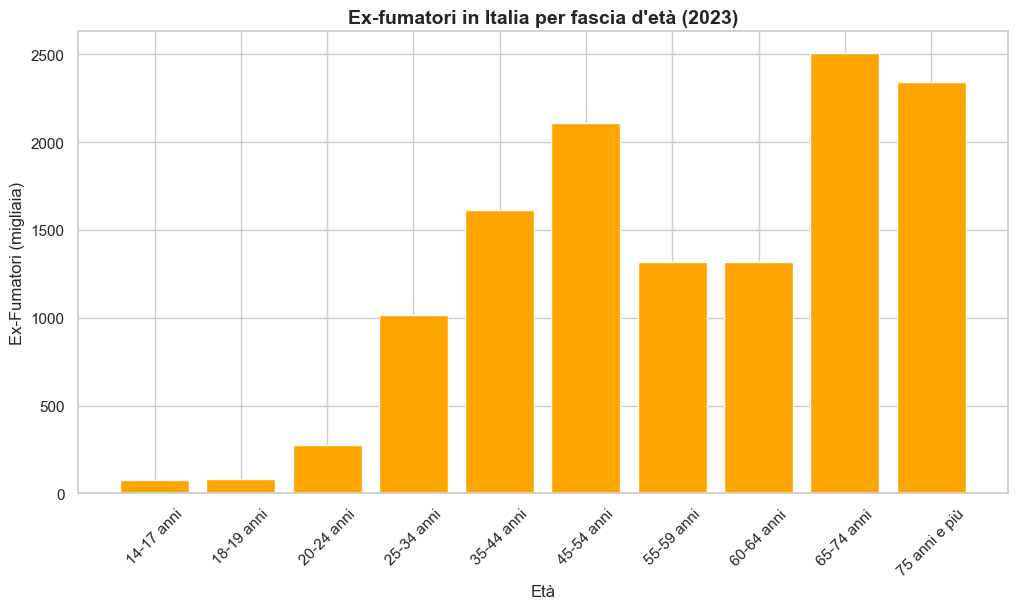

In [165]:
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["Sesso"] == "Totale") &
                 (df["MEASURE"] == 'THV') &
                 (df["DATA_TYPE"] == '14_FUMO_EX')& # filtro per ex fumatori
                 (df["AGE"] != 'Y_GE14')]

anno = df_filtered["Età"]
value = df_filtered["Osservazione"]

plt.figure(figsize=(12, 6))
plt.bar(anno, value, color='orange')
plt.xticks(rotation=45)
plt.xlabel("Età")
plt.ylabel("Ex-Fumatori (migliaia)")
plt.title("Ex-fumatori in Italia per fascia d'età (2023)",fontsize=14, fontweight="bold")
plt.show()

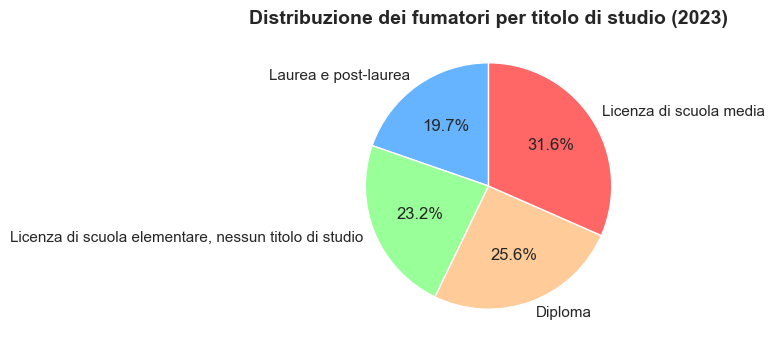

In [166]:
df = pd.read_csv('dati\\Abitudine al fumo - età, titolo di studio.csv',sep=';')

df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
df = df.dropna(subset=['Osservazione'])

# Filtro anno 2023 e solo fumatori (per 100 persone)
df_2023 = df[
    (df['TIME_PERIOD'] == 2023) &
    (df['MEASURE'] == 'HSC') &
    (df['DATA_TYPE'] == '14_FUMO_SI') &
    (df['Sesso'] == 'Totale') &
    (df['Titolo di studio'] != 'Totale')&
    (df['Età'] != '14 anni e più') #escludo la categoria totale
]



#aggregazione dei titoli di studio
df_plot = df_2023.groupby('Titolo di studio', as_index=False)['Osservazione'].mean()
# Ordina per valore
df_plot = df_plot.sort_values('Osservazione', ascending=True)


# Pie chart
plt.figure(figsize=(4,4))
plt.pie(
    df_plot['Osservazione'],
    labels=df_plot['Titolo di studio'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99','#ff6666']
)
plt.title("Distribuzione dei fumatori per titolo di studio (2023)",fontsize=14, fontweight="bold")
plt.show()

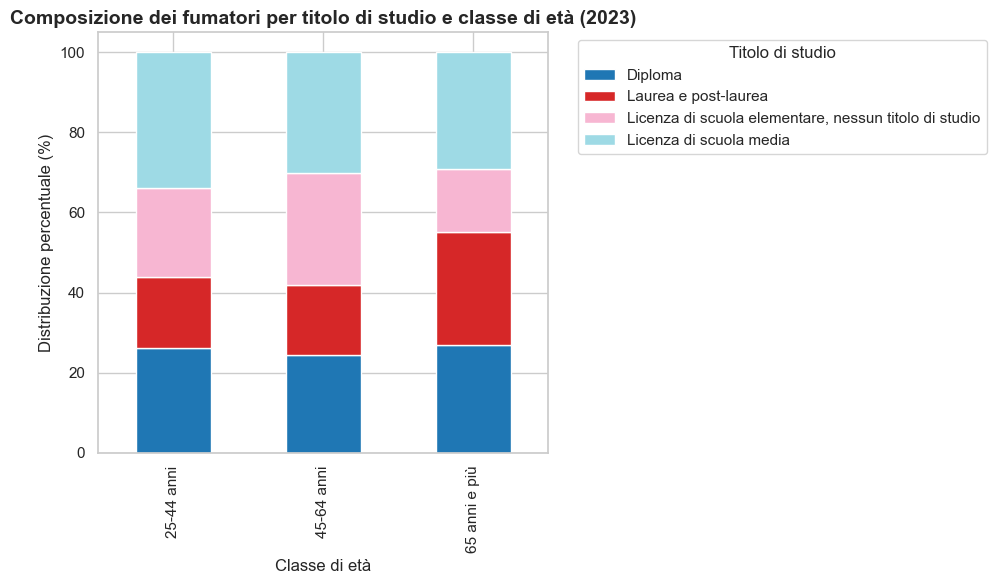

In [167]:
#DOMANDA: Come cambia la composizione dei fumatori per titolo di studio al variare dell’età?

#Pivot table: età x titolo di studio
pivot = df_2023.pivot_table(
    values='Osservazione',
    index='Età',          # nome su cui raggruppare le colonne
    columns='Titolo di studio',  # nome delle singole colonne da impilare
    aggfunc='mean'
)

# Normalizzazione al 100%
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Grafico
pivot_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.ylabel("Distribuzione percentuale (%)")
plt.xlabel("Classe di età")
plt.title("Composizione dei fumatori per titolo di studio e classe di età (2023)",fontsize=14, fontweight="bold")
plt.legend(title="Titolo di studio", bbox_to_anchor=(1.05, 1), loc='upper left') #sposto legenda fuori
plt.tight_layout()
plt.show()

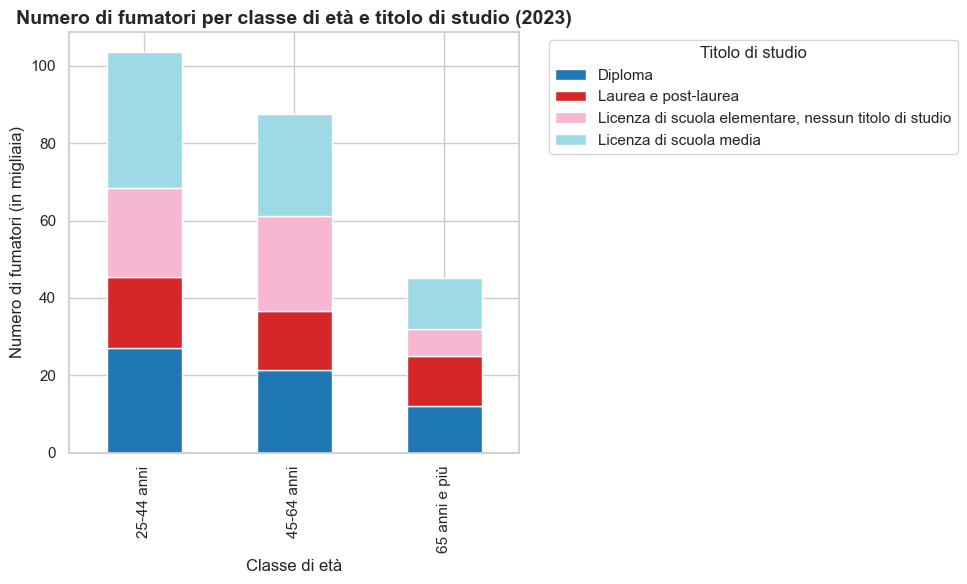

In [168]:
#DOMANDA: Dove si concentra il maggior numero assoluto di fumatori?

# Pivot table: età x titolo di studio
pivot_abs = df_2023.pivot_table(
    values='Osservazione',
    index='Età',
    columns='Titolo di studio',
    aggfunc='sum'           # SOMMA perché sono numeri di persone
)

# Grafico stacked
pivot_abs.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.ylabel("Numero di fumatori (in migliaia)")
plt.xlabel("Classe di età")
plt.title("Numero di fumatori per classe di età e titolo di studio (2023)",fontsize=14, fontweight="bold")
plt.legend(title="Titolo di studio", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Il grafico mostra la distribuzione assoluta dei fumatori: le fasce centrali risultano predominanti
# anche per la maggiore numerosità della popolazione in età attiva.

C:\Users\filos\AppData\Local\Temp\ipykernel_19660\991957923.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Osservazione', y='Condizione e posizione nella professione', data=df_filtered, palette='OrRd')


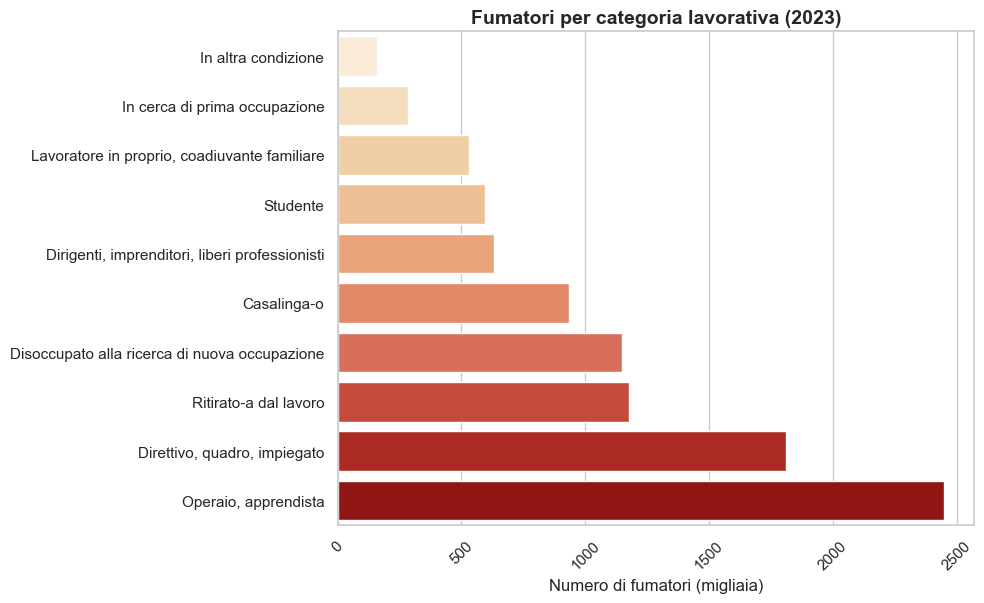

In [169]:
df = pd.read_csv('dati\\Abitudine al fumo - posizione nella professione (IT1,83_63_DF_DCCV_AVQ_PERSONE_203,1.0) (2).csv', sep=';')
#ho scaricato il csv con il punto e virgola come separatore, altrimenti avrebbe dato errore di parsing


df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
df = df.dropna(subset=['Osservazione'])
df = df.sort_values('Osservazione', ascending=True)

df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["Condizione e posizione nella professione"] != 'Totale') &
                 (df["Condizione e posizione nella professione"] != 'Occupato')]

#cambio il nome di una categoria per renderla più leggibile nel grafico
df_filtered['Condizione e posizione nella professione'] = df_filtered['Condizione e posizione nella professione'].replace('Lavoratore in proprio, coadiuvante familiare, co.co.co.', 'Lavoratore in proprio, coadiuvante familiare')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
bars = sns.barplot(x='Osservazione', y='Condizione e posizione nella professione', data=df_filtered, palette='OrRd')



plt.title("Fumatori per categoria lavorativa (2023)",fontsize=14, fontweight="bold")
plt.xlabel("Numero di fumatori (migliaia)")
plt.ylabel("")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

C:\Users\filos\AppData\Local\Temp\ipykernel_19660\1062316240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Osservazione', y='Condizione e posizione nella professione', data=df_media, palette='YlOrBr')


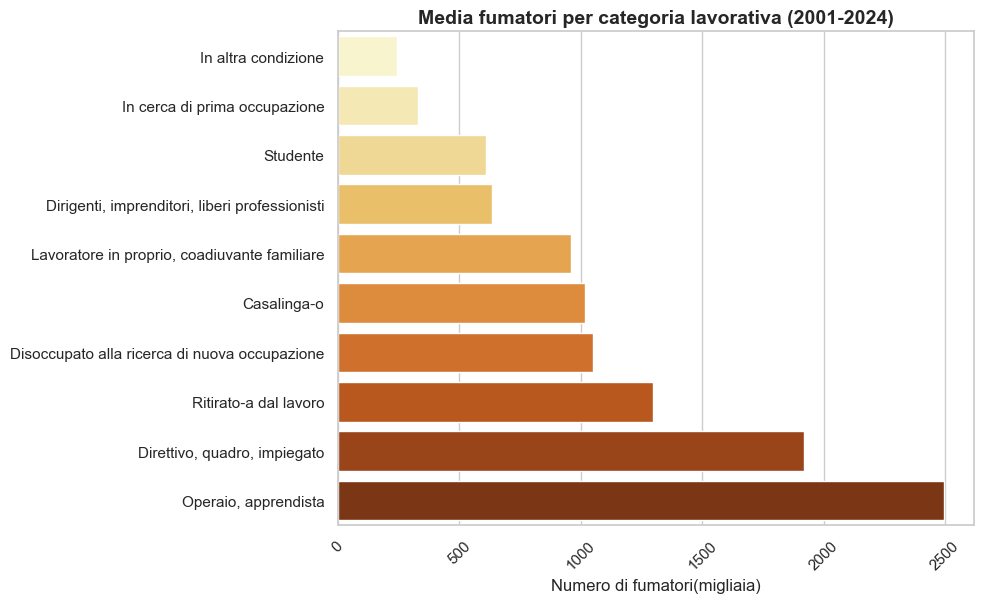

In [170]:
df_filtered = df[(df["Condizione e posizione nella professione"] != 'Totale')
                 & (df["Condizione e posizione nella professione"] != 'Occupato')]

df_media = df_filtered.groupby('Condizione e posizione nella professione')['Osservazione'].mean().reset_index()

#cambio il nome di una categoria per renderla più leggibile nel grafico
df_media['Condizione e posizione nella professione'] = df_media['Condizione e posizione nella professione'].replace('Lavoratore in proprio, coadiuvante familiare, co.co.co.', 'Lavoratore in proprio, coadiuvante familiare')
df_media = df_media.sort_values('Osservazione',ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
bars = sns.barplot(x='Osservazione', y='Condizione e posizione nella professione', data=df_media, palette='YlOrBr')


plt.title("Media fumatori per categoria lavorativa (2001-2024)",fontsize=14, fontweight="bold")
plt.xlabel("Numero di fumatori(migliaia)")
plt.ylabel("")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

C:\Users\filos\AppData\Local\Temp\ipykernel_19660\510431286.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


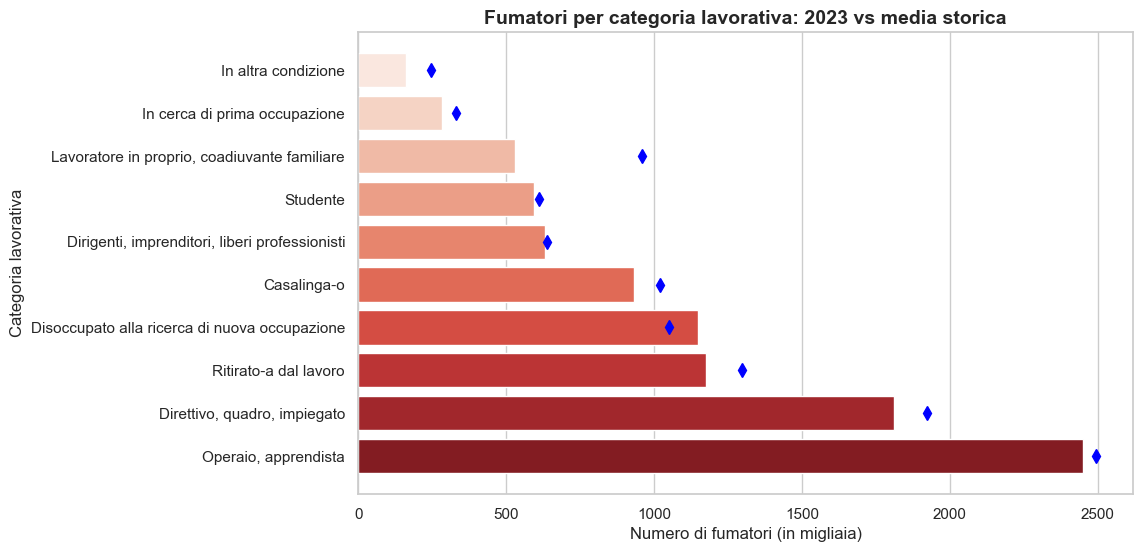

In [171]:
df = pd.read_csv('dati\\Abitudine al fumo - posizione nella professione (IT1,83_63_DF_DCCV_AVQ_PERSONE_203,1.0) (2).csv', sep=';') 
# Pulizia dati
df['TIME_PERIOD'] = df['TIME_PERIOD'].astype(str).str.strip()
df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
df =df[(df["Condizione e posizione nella professione"] != 'Totale')
                 & (df["Condizione e posizione nella professione"] != 'Occupato')]
df = df.dropna(subset=['Osservazione'])
# Dati del 2023
df_2023 = df[df['TIME_PERIOD'] == '2023']
# Dati medi dal 2001 al 2024
df_media = (
    df.groupby('Condizione e posizione nella professione')['Osservazione']
    .mean()
    .reset_index()
    .rename(columns={'Osservazione': 'Media_storica'})
)
# Unione dei due DataFrame
df_plot = pd.merge(
    df_2023[['Condizione e posizione nella professione', 'Osservazione']],
    df_media,
    on='Condizione e posizione nella professione'
)
#Rinomino la colonna per chiarezza
df_plot['Condizione e posizione nella professione'] = df_plot['Condizione e posizione nella professione'].replace('Lavoratore in proprio, coadiuvante familiare, co.co.co.', 'Lavoratore in proprio, coadiuvante familiare')
#Ordino per valore dei fumatori nel 2023
df_plot = df_plot.sort_values('Osservazione', ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))

bars = sns.barplot(
    x='Osservazione',
    y='Condizione e posizione nella professione',
    data=df_plot,
    palette='Reds'
)

# Aggiunta del simbolo della media storica
for i, row in df_plot.iterrows():
    plt.plot(
        row['Media_storica'],
        list(df_plot.index).index(i),
        marker='d',
        color='Blue',
        markersize=7
    )

plt.xlabel("Numero di fumatori (in migliaia)")
plt.ylabel("Categoria lavorativa")
plt.title("Fumatori per categoria lavorativa: 2023 vs media storica",fontsize=14, fontweight="bold")
plt.show()

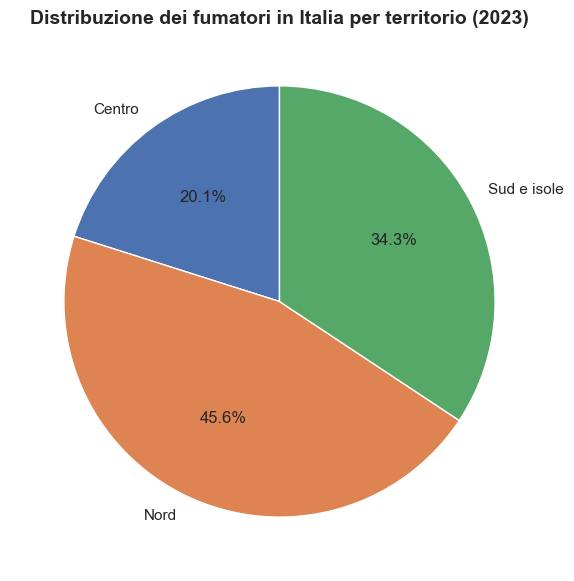

In [172]:
#Dopo aver analizzato chi fuma e in che condizioni sociali, osserviamo come il fenomeno si distribuisce sul territorio.

df = pd.read_csv('dati\\Abitudine al fumo - regioni e tipo di comune.csv')
aree_valide = [ 'Nord', 'Centro', 'Mezzogiorno']

df = df.dropna(subset=['Osservazione'])
df_2023 = df[(df['TIME_PERIOD'] == 2023) & (df['MEASURE'] == 'THV') & (df['DATA_TYPE'] == '14_FUMO_SI') &(df['Territorio'].isin(aree_valide))]
df_2023['Territorio'] = df_2023['Territorio'].replace('Mezzogiorno', 'Sud e isole')
df_pie = ( df_2023.groupby('Territorio')['Osservazione'] .sum() .reset_index() )
plt.figure(figsize=(7,7))
plt.pie( df_pie['Osservazione'], labels=df_pie['Territorio'], autopct='%1.1f%%', startangle=90 )
plt.title("Distribuzione dei fumatori in Italia per territorio (2023)",fontsize=14, fontweight="bold")
plt.show()

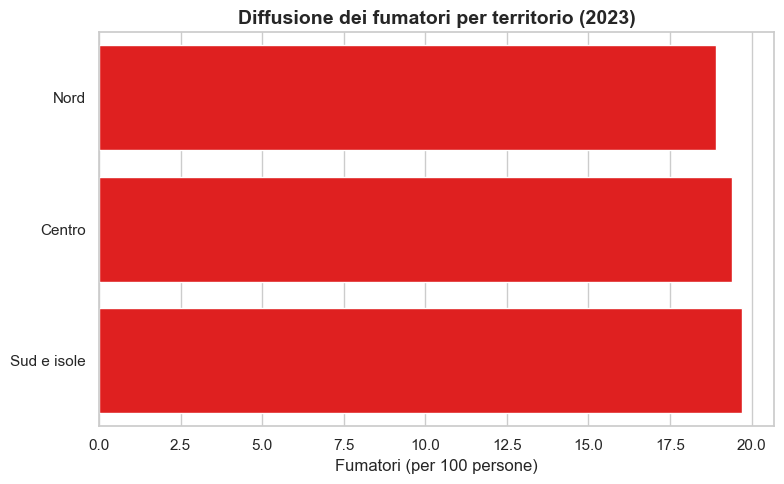

In [173]:
#la torta mostra la distribuzione, ma non tiene conto della diversa dimensione delle regioni

df_2023 = df[(df['TIME_PERIOD'] == 2023) &
             (df['MEASURE'] == 'HSC') &
             (df['DATA_TYPE'] == '14_FUMO_SI') &
             (df['Territorio'].isin(aree_valide))]

df_2023['Territorio'] = df_2023['Territorio'].replace('Mezzogiorno', 'Sud e isole')
# rimuovo spazi e converto in numerico, coercendo eventuali errori
df_2023['Osservazione'] = pd.to_numeric(df_2023['Osservazione'].str.strip(), errors='coerce')
#ordino per valore medio
df_plot = (
    df_2023
    .groupby('Territorio')['Osservazione']
    .mean()
    .reset_index()
    .sort_values('Osservazione', ascending=True)
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_plot,
    x='Osservazione',
    y='Territorio',
    color='Red'
)


plt.title("Diffusione dei fumatori per territorio (2023)",fontsize=14, fontweight="bold")
plt.xlabel("Fumatori (per 100 persone)")
plt.ylabel("")

plt.tight_layout()
plt.show()

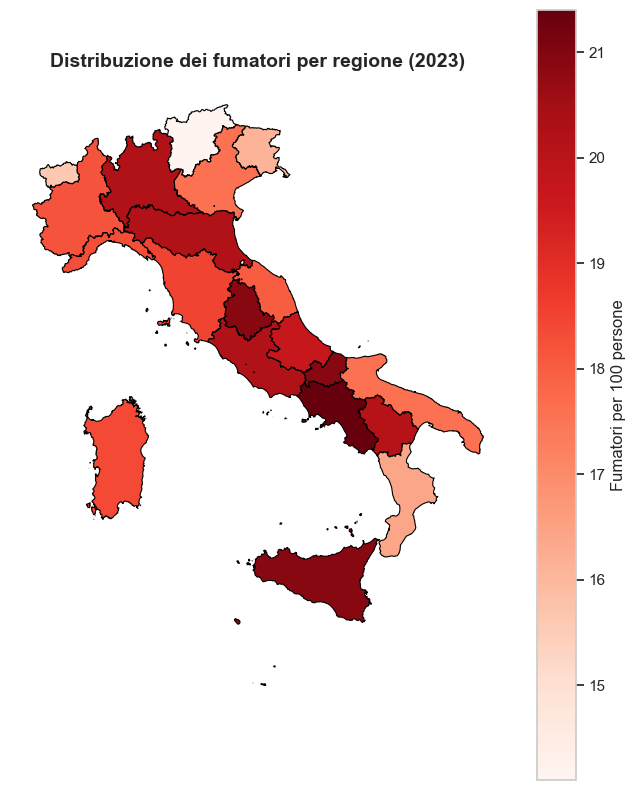

In [174]:
# ...Ma possiamo fare di meglio?

#leggo shapefile
italia = gpd.read_file("dati\\Shapefile\\Reg01012023_g_WGS84.shp")
#print(italia['DEN_REG'].tolist())
df = pd.read_csv('dati\\Abitudine al fumo - regioni e tipo di comune.csv')

# filtro anno e fumatori per 100 persone ed elimino regioni non valide
df_2023 = df[(df['TIME_PERIOD'] == 2023) & (df['MEASURE'] == 'HSC') & (df['DATA_TYPE'] == '14_FUMO_SI')]
# pulizia numeri
df_2023['Osservazione'] = pd.to_numeric(
    df_2023['Osservazione'].str.replace(',', '.'), errors='coerce'
)
df_2023 = df_2023.dropna(subset=['Osservazione'])
# rinomino regioni per match con shapefile
rinomina_regioni = {
    '\'Valle d"\'Aosta / Vallée d"\'Aoste\'': 'Valle d\'Aosta',
    'Trentino Alto Adige / Südtirol': 'Trentino-Alto Adige'
}
df_2023['Territorio'] = df_2023['Territorio'].replace(rinomina_regioni)
# lista di regioni valide dal shapefile
regioni_valide = italia['DEN_REG'].tolist()
# filtro
df_2023 = df_2023[df_2023['Territorio'].isin(regioni_valide)].copy()
# aggrego per regione
df_regione = df_2023.groupby('Territorio')['Osservazione'].mean().reset_index()

#merge tra shapefile e dati
mappa = italia.merge(df_regione, left_on='DEN_REG', right_on='Territorio')
# plot
fig, ax = plt.subplots(1, 1, figsize=(8,10))

mappa.plot(
    column='Osservazione',
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Fumatori per 100 persone"},
    ax=ax  # IMPORTANTISSIMO: passa ax qui
)

ax.set_title("Distribuzione dei fumatori per regione (2023)",fontsize=14, fontweight="bold")
ax.axis('off')
plt.show()


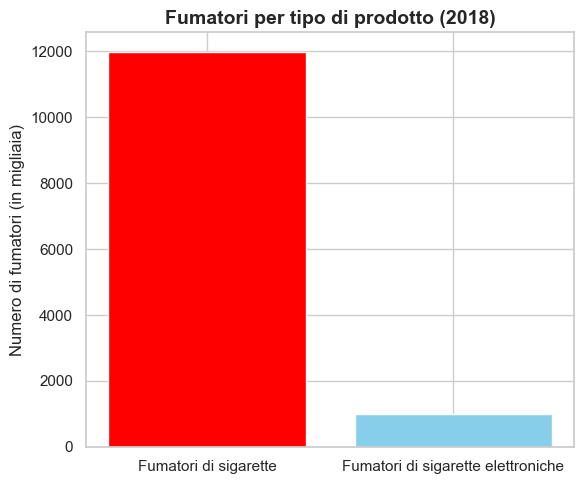

In [175]:
df = pd.read_excel('dati\\tipi di fumo.xlsx')
df_2018 = df[df['Year'] == 2018]
df_2018 = df_2018[df_2018['Variable'].isin(['Number current cigarette smokers', 'Number current e-cigarette users'])]
df_2018 = df_2018.sort_values('Data', ascending=False)

rinomina = {
    'Number current cigarette smokers': 'Fumatori di sigarette',
    'Number current e-cigarette users': 'Fumatori di sigarette elettroniche'
}
df_2018['Variable'] = df_2018['Variable'].replace(rinomina)

valori_migliaia = df_2018['Data'] /1000 #conversione in migliaia
plt.figure(figsize=(6,5))
plt.bar(df_2018['Variable'], valori_migliaia, color=['red','skyblue'])
plt.ylabel("Numero di fumatori (in migliaia)")
plt.title("Fumatori per tipo di prodotto (2018)",fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

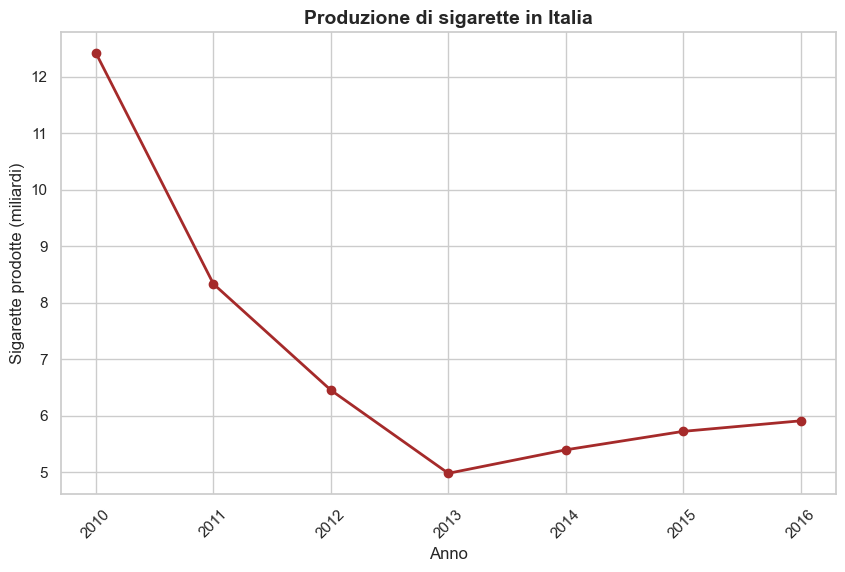

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dati\\produzione.csv", sep=";")
df = df[["Year", "Data"]]
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Data"] = pd.to_numeric(df["Data"], errors="coerce")
df = df.dropna().sort_values("Year")

#Divide per 1 miliardo per visualizzare i dati in miliardi
df["Data_mld"] = df["Data"] / 1e9

plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Data_mld"], marker="o", color="brown", linewidth=2.0)

plt.xlabel("Anno", fontsize=12)
plt.ylabel("Sigarette prodotte (miliardi)", fontsize=12)
plt.title("Produzione di sigarette in Italia", fontsize=14, fontweight="bold")

plt.xticks(rotation=45)
plt.show()

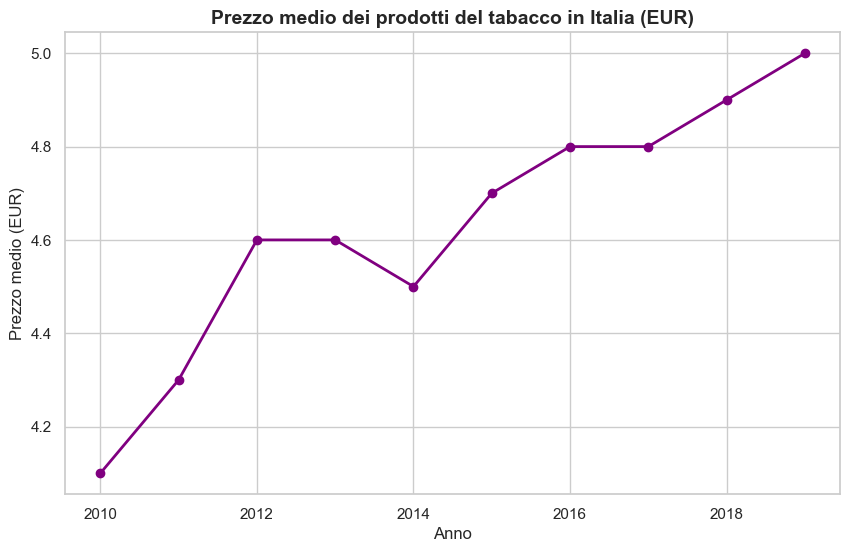

In [177]:
df = pd.read_excel('dati\\avg retail price.xlsx')
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Data'], marker='o', color='purple', linewidth=2.0)

plt.title("Prezzo medio dei prodotti del tabacco in Italia (EUR)",fontsize=14, fontweight="bold")
plt.xlabel("Anno")
plt.ylabel("Prezzo medio (EUR)")
plt.show()

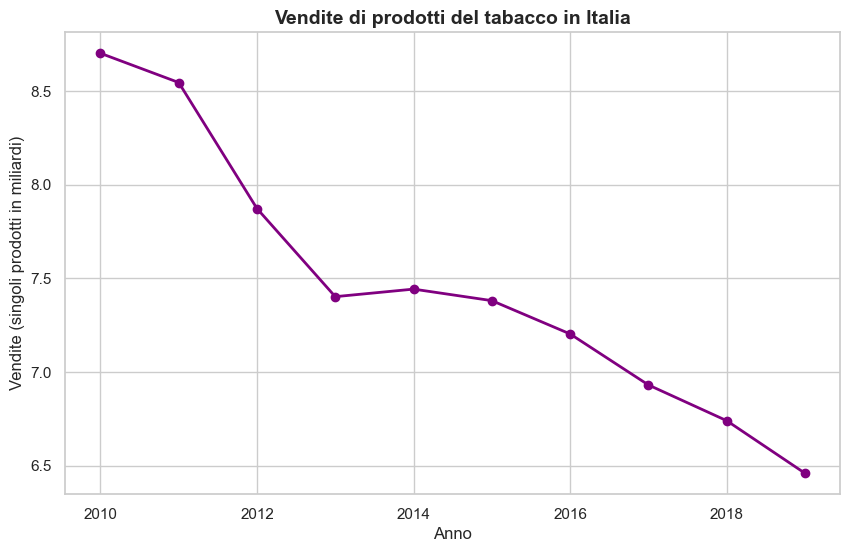

In [178]:
df = pd.read_excel('dati\\sales.xlsx')
vendite = df['Data'] / 1e10  # conversione in miliardi
plt.figure(figsize=(10,6))
plt.plot(df['Year'], vendite, marker='o', color='purple', linewidth=2.0)

plt.title("Vendite di prodotti del tabacco in Italia",fontsize=14, fontweight="bold")
plt.xlabel("Anno")
plt.ylabel("Vendite (singoli prodotti in miliardi)")
plt.show()

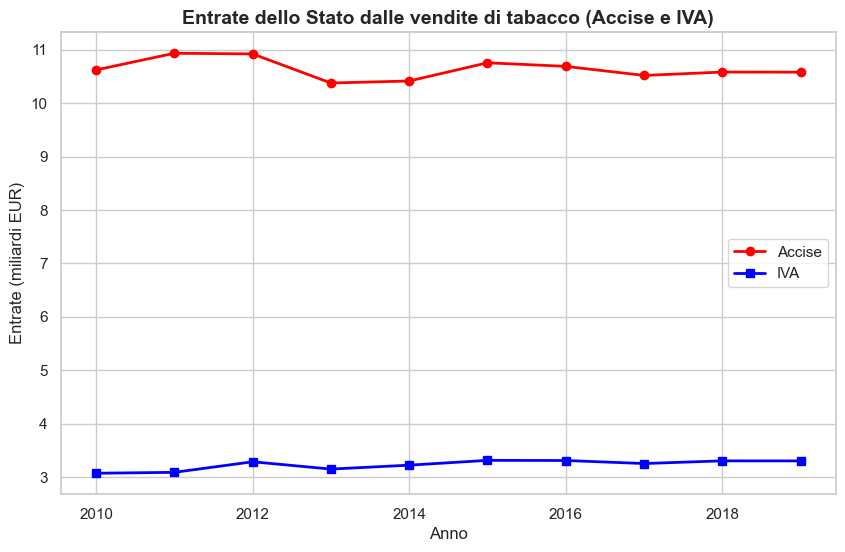

In [179]:
#guadagni stato accise e iva
df = pd.read_excel('dati\\guadagni stato.xlsx')
df_accise = df[df['Variable'] == 'Government revenues from the excise taxes on tobacco products']
accise = df_accise['Data'] / 1e9  # conversione in miliardi
df_iva = df[df['Variable'] == 'Government revenues from VAT (Value Added Tax) on tobacco products']
iva = df_iva['Data'] / 1e9  # conversione in miliardi
plt.figure(figsize=(10,6))
plt.plot(df_accise['Year'], accise, marker='o', label='Accise', color='red', linewidth=2.0)
plt.plot(df_iva['Year'], iva, marker='s', label='IVA', color='blue', linewidth=2.0)

plt.title("Entrate dello Stato dalle vendite di tabacco (Accise e IVA)",fontsize=14, fontweight="bold")
plt.xlabel("Anno")
plt.ylabel("Entrate (miliardi EUR)")
plt.legend()
plt.show()

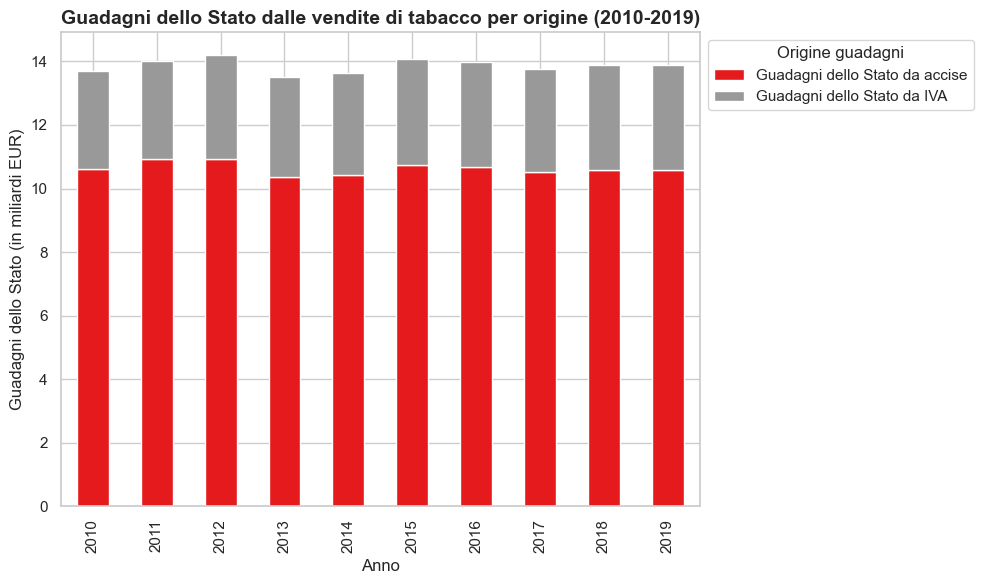

In [180]:
df = pd.read_excel('dati\\guadagni stato.xlsx')

pivot_abs = df.pivot_table(
    values='Data',
    index='Year',
    columns='Variable',
    aggfunc='sum'
)
pivot_abs = pivot_abs / 1e9  # conversione in miliardi



rename_dict = {
    'Government revenues from VAT (Value Added Tax) on tobacco products': 'Guadagni dello Stato da IVA',
    'Government revenues from the excise taxes on tobacco products': 'Guadagni dello Stato da accise'
}
pivot_abs = pivot_abs.rename(columns=rename_dict)
pivot_abs = pivot_abs[['Guadagni dello Stato da accise', 'Guadagni dello Stato da IVA']]
# Grafico stacked
pivot_abs.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set1'
)


plt.ylabel("Guadagni dello Stato (in miliardi EUR)")
plt.xlabel("Anno")
plt.title("Guadagni dello Stato dalle vendite di tabacco per origine (2010-2019)",fontsize=14, fontweight="bold")
plt.legend(title="Origine guadagni", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#Le accise costituiscono la componente strutturale del gettito,
# mentre l’IVA rappresenta una quota aggiuntiva proporzionale al prezzo finale.

C:\Users\filos\AppData\Local\Temp\ipykernel_19660\785786845.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Text(0.5, 1.0, 'Smoking prevalence by country in EU (2023)')

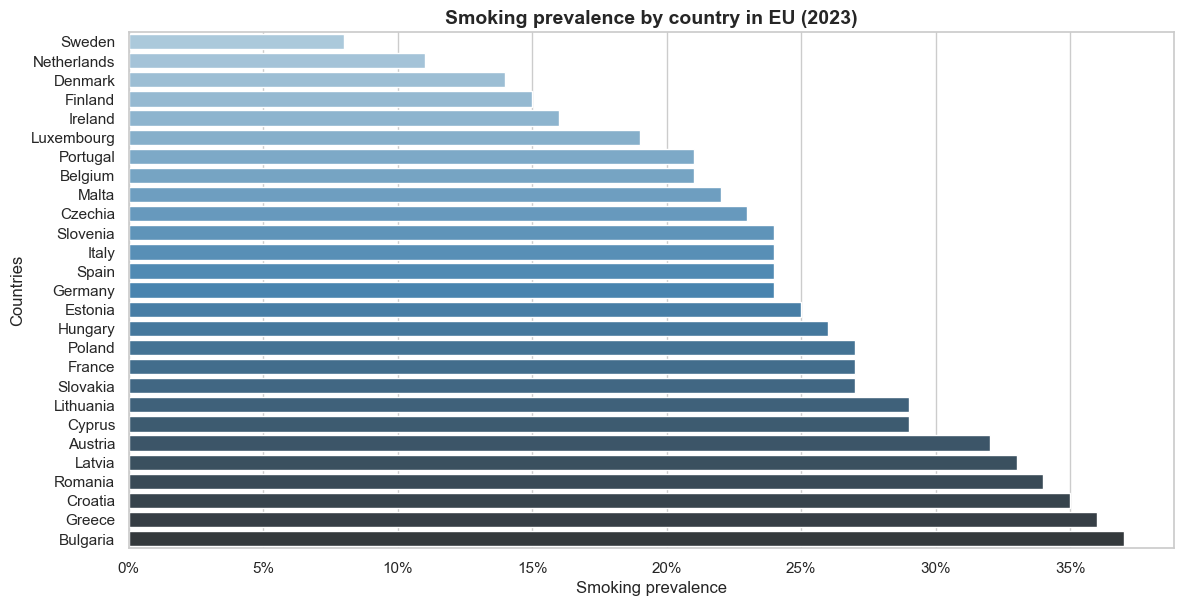

In [214]:
# Load data from CSV file
df = pd.read_csv('dati\\Smoking prevalence by sex.csv')
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["Sex"] == "Total") &
                 (df["geo"] != "EU27_2020") & (df["geo"] != "EU")]
df_filtered = df_filtered.dropna(subset=["OBS_VALUE"])
#x = np.arange(len(geo)) * 1 # Spacing 

df_filtered = df_filtered.sort_values("OBS_VALUE", ascending=True)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_filtered,
    x='OBS_VALUE',
    y='Geopolitical entity (reporting)',
    palette="Blues_d"
)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x)}%"))
plt.xlabel("Smoking prevalence")
plt.ylabel("Countries")
plt.tight_layout()
plt.title("Smoking prevalence by country in EU (2023)",fontsize=14, fontweight="bold")